# Datos Abiertos Colombia: Producción Leche (Litros/Día) - DEPARTAMENTO DE BOYACÁ

## Tomado de : https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Producci-n-Leche-Litros-D-a-DEPARTAMENTO-DE-BOYAC-/3urw-7985

Este es un ejemplo con la lectura de datos de Leche producida en el departamento de Boyaca

In [22]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [26]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
!pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("3urw-7985", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

,a_o,municipio,tipo_de_explotacion,produccion_por_vaca_litros_dia,vacas_para_orde_o,total_litros_d_a
0,2016,SORACA,LECHERIA TRADICIONAL,8,210,1680
1,2016,CUCAITA,LECHERIA TRADICIONAL,6,292,1752
2,2016,CALDAS,LECHERIA ESPECIALIZADA,12,800,9600
3,2016,SANTA SOFIA,LECHERIA ESPECIALIZADA,NaN,NaN,NaN
4,2016,BERBEO,LECHERIA ESPECIALIZADA,NaN,NaN,NaN
...,...,...,...,...,...,...
1102,2018,VIRACACHA,LECHERIA TRADICIONAL,5.0,300,1500
1103,2018,VIRACACHA,DOBLE PROPOSITO,6.5,60,390
1104,2018,ZETAQUIRA,LECHERIA ESPECIALIZADA,10.0,100,1000
1105,2018,ZETAQUIRA,LECHERIA TRADICIONAL,5.0,1000,5000


## Descripcion Basica

In [48]:
results_df.shape

(786, 6)

In [49]:
results_df.describe()

,a_o,municipio,tipo_de_explotacion,produccion_por_vaca_litros_dia,vacas_para_orde_o,total_litros_d_a
count,786,786,786,786,786,786
unique,3,123,3,48,287,402
top,2017,COMBITA,DOBLE PROPOSITO,4,200,800
freq,269,9,342,75,32,15


## Clean Data

In [50]:
results_df.dropna(inplace=True)

In [51]:
results_df.describe()

,a_o,municipio,tipo_de_explotacion,produccion_por_vaca_litros_dia,vacas_para_orde_o,total_litros_d_a
count,786,786,786,786,786,786
unique,3,123,3,48,287,402
top,2017,COMBITA,DOBLE PROPOSITO,4,200,800
freq,269,9,342,75,32,15


## Frecuancias

In [52]:
def tabla_frecuencias_unico(df, serie, lista): 
    '''
    Dataframe tabla de frecuencia (no intervalo), con porcentaje y acumulado
    '''
    frecuencia=[] 
    indice=[]
    for i in lista: 
        filtro = (df[serie]==i) 
        serie_filtro = df[serie][filtro]

        indice.append(i)
        frecuencia.append(len(serie_filtro))
    tabla = pd.DataFrame(index = indice)
    tabla["Frecuencias"] = frecuencia
    tabla["%"] = round(tabla["Frecuencias"]/tabla["Frecuencias"].sum()*100,2)
    return tabla

In [53]:
tabla = tabla_frecuencias_unico(results_df, "tipo_de_explotacion", ["LECHERIA TRADICIONAL", "LECHERIA ESPECIALIZADA", "DOBLE PROPOSITO"])

In [54]:
tabla

,Frecuencias,%
LECHERIA TRADICIONAL,275,34.99
LECHERIA ESPECIALIZADA,169,21.50
DOBLE PROPOSITO,342,43.51


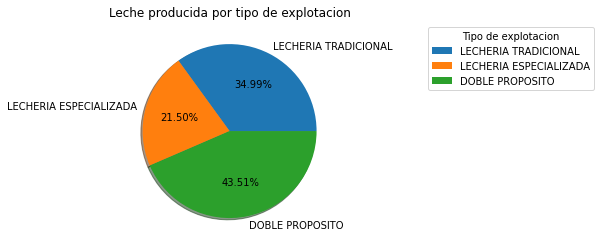

In [55]:
plt.pie(tabla["%"], labels=tabla.index, autopct='%1.2f%%',shadow=True)
plt.title("Leche producida por tipo de explotacion")
plt.legend(title="Tipo de explotacion", bbox_to_anchor=(1.7, 0, 0.5, 1))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


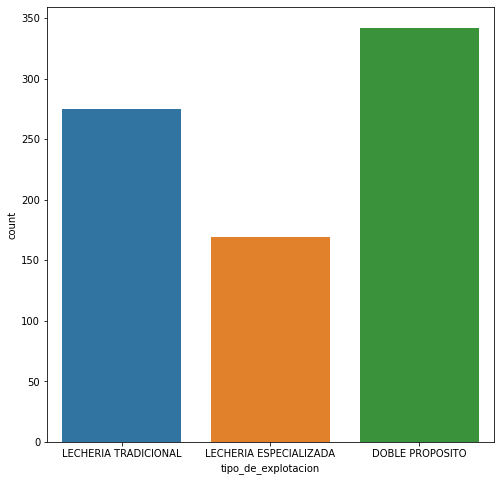

In [56]:
plt.figure(figsize=(8,8))
sns.countplot(results_df['tipo_de_explotacion'])

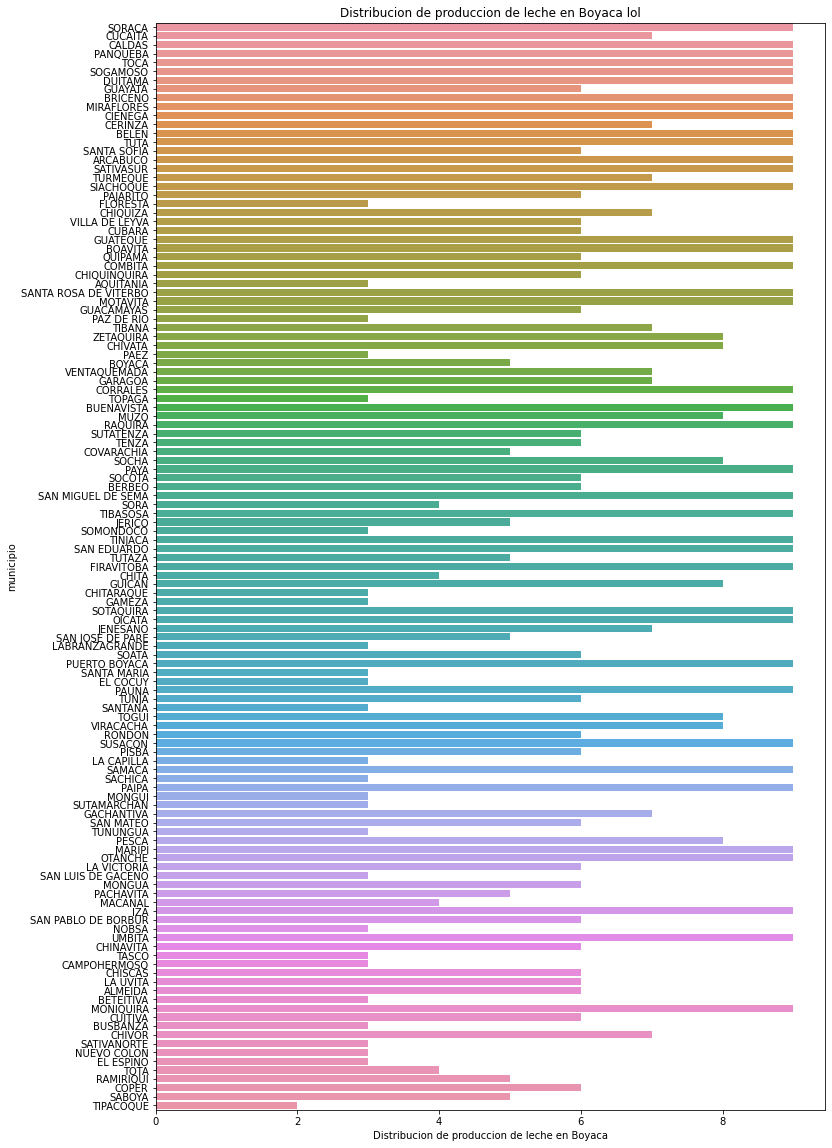

In [57]:
plt.figure(figsize=(12,20))
plt.title("Distribucion de produccion de leche en Boyaca lol")
ax=sns.countplot(y="municipio",data=results_df)
ax.set_xlabel("Distribucion de produccion de leche en Boyaca")
plt.show()

- Entre 2 Variables

In [58]:
results_df.dtypes

a_o                               object
municipio                         object
tipo_de_explotacion               object
produccion_por_vaca_litros_dia    object
vacas_para_orde_o                 object
total_litros_d_a                  object
dtype: object

In [67]:
results_df['total_litros_d_a'] = results_df['total_litros_d_a'].astype(float)
results_df.dtypes

a_o                                object
municipio                          object
tipo_de_explotacion                object
produccion_por_vaca_litros_dia     object
vacas_para_orde_o                   int64
total_litros_d_a                  float64
dtype: object

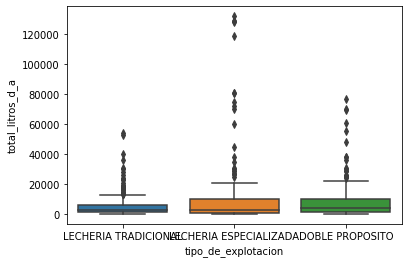

In [69]:
sns.boxplot(x=results_df["tipo_de_explotacion"], y=results_df["total_litros_d_a"])